# Introduction to SQL
    
In Week 1 you cleaned the data obtained from `lacity.org` that recorded details on traffic accidents.  You prepped this data to load it into a SQL database. But what we will see as we continue to analyze the data, is that there is more cleaning that needs to happen.
    
## Deliverables:
- Submit two files that has the name <span style='color:red'><b> YourLastName_Assingment_2: </span></b>
    1. Your **HTML** file that has your Source code and output
    2. Your **ipynb script** that has your Source code and output
    
## Objectives:
In this exercise you will use data cleaned from Week 1 of our class:
- Load data from csv file into a DataFrame Object
- Analyze the data using SQL and Python
- Use sqlalchemy to load data stored in a DataFrame object into SQLite database engine
- Use sqlalchemy to connect to SQLite database engine to execute SQL queries
- Execute different SQL queries


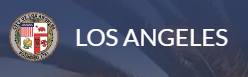

https://data.lacity.org/Public-Safety/Traffic-Collision-Data-from-2010-to-Present/d5tf-ez2w

### Structured Query Language (SQL) versus Python

The discussion board this week has you comparing the use of SQL to a general purpose language like Python.  What you will be able to test out this week in the homework is the mixing/matching of using SQL and Python to analyze data.

In [2]:
# load libraries
import pandas as pd
import numpy as np
# https://docs.sqlalchemy.org/en/13/intro.html
import sqlalchemy
from sqlalchemy import create_engine

import matplotlib.pyplot as plt
import seaborn as sns

# set up notebook to display multiple output in one cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
# ------------------------------------------------------
# read in file from Week 1
# ------------------------------------------------------
df = pd.read_csv("Final Traffic.csv")

# check out fields
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549547 entries, 0 to 549546
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   DR_Number           549547 non-null  int64  
 1   Date                549547 non-null  object 
 2   Division            549547 non-null  object 
 3   Reporting_District  549547 non-null  int64  
 4   Age                 549547 non-null  int64  
 5   Gender              549547 non-null  object 
 6   Descent             549547 non-null  object 
 7   Year                549547 non-null  int64  
 8   Month               549547 non-null  int64  
 9   Day                 549547 non-null  int64  
 10  Hour                549547 non-null  int64  
 11  imputeAge           549547 non-null  bool   
 12  Latitude            549547 non-null  float64
 13  Longitude           549547 non-null  float64
dtypes: bool(1), float64(2), int64(7), object(4)
memory usage: 55.0+ MB


In [4]:
# look at the first 5 records
df.head()

,DR_Number,Date,Division,Reporting_District,Age,Gender,Descent,Year,Month,Day,Hour,imputeAge,Latitude,Longitude
0,190319651,08/24/2019,Southwest,356,22,Male,Hispanic,2019,8,24,4,False,34.0255,-118.3002
1,190319680,08/30/2019,Southwest,355,30,Female,Hispanic,2019,8,30,23,False,34.0256,-118.3089
2,190413769,08/25/2019,Hollenbeck,422,40,Male,Unknown,2019,8,25,5,True,34.0738,-118.2078
3,190127578,11/20/2019,Central,128,21,Male,Hispanic,2019,11,20,3,False,34.0492,-118.2391
4,190319695,08/30/2019,Southwest,374,49,Male,Black,2019,8,30,21,False,34.0108,-118.3182


### Load traffic data into a table in a SQLite database

- we are creating a database called `LAtraffic`
- we are creating a table called `traffic`


In [5]:
# 'engine' will be used to reference the database
engine = create_engine('sqlite:///LAtraffic.db')

df.to_sql('traffic', engine, if_exists = 'replace', index = False)
# check out columns in table
pd.read_sql_table('traffic', engine).columns

549547

Index(['DR_Number', 'Date', 'Division', 'Reporting_District', 'Age', 'Gender',
       'Descent', 'Year', 'Month', 'Day', 'Hour', 'imputeAge', 'Latitude',
       'Longitude'],
      dtype='object')

### Next read in the MO file we created earlier in the class and add to the database

- we are creating a table in the `LAtraffic` database called `MO_accident`

In [6]:
# specify that the codes column is a string, not an int so we don't lose leading zeros
mo = pd.read_csv("MO per accident.csv",dtype = {'MO_Codes':'str'})

mo.to_sql('MO_accident', engine, if_exists = 'replace', index = False)
# check out columns in table
pd.read_sql_table('MO_accident', engine).columns

3033153

Index(['DR_Number', 'MO_Codes'], dtype='object')

### Now read in a file that contains all MO codes and a description of what they mean

- we are creating a table in the `LAtraffic` database called `MO_master`

In [7]:
# specify that the codes column is a string, not an int so we don't lose leading zeros
mo_mast = pd.read_csv("MO master.csv", dtype = {'Codes':'str'})

mo_mast.to_sql('MO_master', engine, if_exists = 'replace', index = False)
# check out the columns
pd.read_sql_table('MO_master', engine).columns

777

Index(['Codes', 'Description'], dtype='object')

### You can see the three tables that are now saved into the `LAtraffic` database

In [8]:
from sqlalchemy import schema
xMetaData = schema.MetaData(bind = engine)
xMetaData.reflect()
# will show table names
xMetaData.tables.keys()

dict_keys(['MO_accident', 'MO_master', 'traffic'])

### Simple query using * to select all columns

- Clean, easy-to-read code has main query commands each on a new line (SELECT and FROM on separate lines)
- SELECT specifies the columns in a table
- FROM specifies the table name
- engine refers to the database named in the create_engine cell

In [9]:
# using pandas read_sql_query returns a dataframe
q1 = pd.read_sql_query("SELECT * \
                        FROM MO_accident", engine)
q1.head(10)

,DR_Number,MO_Codes
0,190319651,3036
1,190319651,3004
2,190319651,3026
3,190319651,3101
4,190319651,4003
5,190319680,3037
6,190319680,3006
7,190319680,3028
8,190319680,3030
9,190319680,3039


In [10]:
# same query, but you can choose to have query string separate
qstring = "SELECT * \
           FROM MO_accident"
q1a = pd.read_sql_query(qstring, engine)
q1a.head()

,DR_Number,MO_Codes
0,190319651,3036
1,190319651,3004
2,190319651,3026
3,190319651,3101
4,190319651,4003


In [11]:
# can use three single quotes and then no need for \ for line continuation
query = '''SELECT * 
           FROM MO_accident'''
q1b = pd.read_sql_query(query, engine)
q1b.head()

,DR_Number,MO_Codes
0,190319651,3036
1,190319651,3004
2,190319651,3026
3,190319651,3101
4,190319651,4003


### Using SELECT for specific fields

- can individually pull out specific fields

In [12]:
q2 = pd.read_sql_query("SELECT Division, Gender, Age \
                        FROM traffic", engine)
q2.head(10)

,Division,Gender,Age
0,Southwest,Male,22
1,Southwest,Female,30
2,Hollenbeck,Male,40
3,Central,Male,21
4,Southwest,Male,49
5,Hollenbeck,Male,60
6,Harbor,Male,73
7,Southwest,Male,39
8,Southwest,Male,48
9,Hollenbeck,Male,68


### Can count and group the results

- `Count(*)` will count the rows that qualify
- `AS` allows you to rename the result to a more user friendly column name (in this example 'Accidents')
- `GROUP BY` is how the counts are accumulated - in this case by MO_Codes

**SQL Aggregate Functions**
- COUNT:  returns number of values in a specific column
- SUM: returns the sum of the values in a specific column
- AVG: returns the average of the values in a specific column
- MIN: returns the smallest value in a specific column
- MAX: returns the largest value in a specific column

In [14]:
# count of MO codes
q3 = pd.read_sql_query("SELECT MO_Codes, count(*) AS Accidents \
                        FROM MO_accident \
                        GROUP BY MO_Codes ", engine)
q3

,MO_Codes,Accidents
0,0100,5
1,0101,943
2,0102,21
3,0103,6
4,0104,7
...,...,...
325,4024,4753
326,4025,35028
327,4026,80404
328,4027,56145


### ORDER BY will determine the output order

In [16]:
# count of MO codes
q4 = pd.read_sql_query("SELECT MO_Codes, count(*) AS Count \
                        FROM MO_accident \
                        GROUP BY MO_Codes \
                        ORDER BY Count DESC", engine)
q4

,MO_Codes,Count
0,3101,402493
1,3701,327780
2,3401,327721
3,3004,242872
4,3037,212281
...,...,...
325,0316,1
326,0310,1
327,0309,1
328,0118,1


### Check out the MO_master table

In [18]:
# what is in the MO_master table?
query = "SELECT * \
         FROM MO_master"
q5 = pd.read_sql_query(query, engine)
q5.head(10)

,Codes,Description
0,0100,Suspect Impersonate
1,0101,Aid victim
2,0102,Blind
3,0103,Crippled
4,0104,Customer
5,0105,Delivery
6,0106,Doctor
7,0107,God
8,0108,Infirm
9,0109,Inspector


### Joining two tables using WHERE clause

- in the `WHERE` line below we are joining the **MO_accident** table with the **MO_master** table
- the two tables are being joined on the MO_Codes column of the MO_accident table and the Codes column of the MO_master table
- this type of join is called an Inner Join

<div>
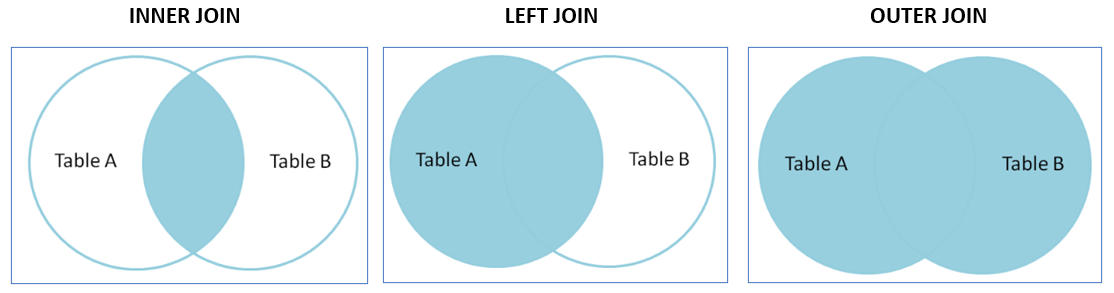
</div>


<div>
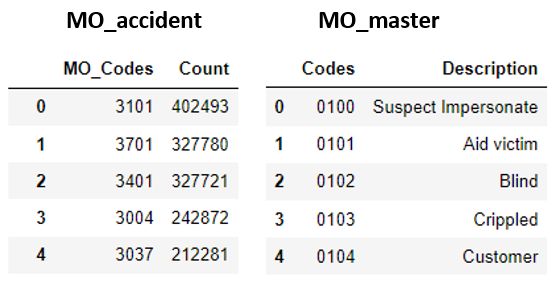
</div>


In [19]:
# look at MO codes with descriptions
q6 = pd.read_sql_query("SELECT MO_Codes, Description, count(*) AS Count \
                        FROM MO_accident a, MO_master m \
                        WHERE a.MO_Codes = m.Codes \
                        GROUP BY MO_Codes \
                        ORDER BY Count DESC", engine)
q6.head(20)

,MO_Codes,Description,Count
0,3101,T/C - PCF (A) In the Narrative,402493
1,3701,T/C - Movement Preceding Collision,327780
2,3401,T/C - Type of Collision,327721
3,3004,T/C - Veh vs Veh,242872
4,3037,T/C - At Intersection - No,212281
5,3030,T/C - Hit and Run Misd,184005
6,3028,T/C - (N) Non Injury,149323
7,3026,T/C - (C) Complaint of Injury,133923
8,3036,T/C - At Intersection - Yes,116366
9,3006,T/C - Veh vs Parked Veh,102339


### Using JOIN to connect two tables

In [20]:
# same query as above but using JOIN to connect the tables
q6a = pd.read_sql_query("SELECT Mo_Codes, Description, count(*) AS Count \
                        FROM MO_accident a \
                        JOIN MO_master m ON a.MO_Codes = m.Codes \
                        GROUP BY MO_Codes \
                        ORDER BY Count DESC", engine)
q6a.head(20)

,MO_Codes,Description,Count
0,3101,T/C - PCF (A) In the Narrative,402493
1,3701,T/C - Movement Preceding Collision,327780
2,3401,T/C - Type of Collision,327721
3,3004,T/C - Veh vs Veh,242872
4,3037,T/C - At Intersection - No,212281
5,3030,T/C - Hit and Run Misd,184005
6,3028,T/C - (N) Non Injury,149323
7,3026,T/C - (C) Complaint of Injury,133923
8,3036,T/C - At Intersection - Yes,116366
9,3006,T/C - Veh vs Parked Veh,102339


### Using WHERE to select a subset of data

- equals: =
- not equals: <> or != 
- is less than: <
- is greater than: >
- is less than or equal to: <= 
- is greater than or equal to: >=

In [21]:
# isolating 2010 data
q7 = pd.read_sql_query("SELECT Month, count(DR_Number) AS Count \
                        FROM traffic \
                        WHERE Year = 2010 \
                        GROUP BY Month \
                        ORDER BY Month", engine)
q7

,Month,Count
0,1,3629
1,2,3440
2,3,3796
3,4,3621
4,5,3748
5,6,3575
6,7,3698
7,8,3618
8,9,3512
9,10,3977


### Logical Operators

- `AND`, `OR` and `NOT`
- Expressions are evaluated left to right
- Subexpressions in brackets are evaluated first
- NOT is evaluated before AND and OR
- AND is evaluated before OR

In [22]:
# isolating 2010 data along with Jan, Feb and March
q7a = pd.read_sql_query("SELECT Month, count(DR_Number) AS Count \
                        FROM traffic \
                        WHERE Year < 2011 AND Month < 4\
                        GROUP BY Month \
                        ORDER BY Month", engine)
q7a

,Month,Count
0,1,3629
1,2,3440
2,3,3796


### BETWEEN and NOT BETWEEN

- Note that BETWEEN values are inclusive with month 1, 2, 3 and 4 qualifying with the query below.



In [23]:
# isolating 2010 data
q7b = pd.read_sql_query("SELECT Month, count(DR_Number) AS Count \
                         FROM traffic \
                         WHERE Year < 2011 AND Month BETWEEN 1 and 4\
                         GROUP BY Month \
                         ORDER BY Month", engine)
q7b

,Month,Count
0,1,3629
1,2,3440
2,3,3796
3,4,3621


### IN and NOT IN

- Tests whether a data value matches one of a list of values
- Must be an exact match

In [24]:
q8 = pd.read_sql_query("SELECT Mo_Codes, Description, count(*) AS Count \
                        FROM MO_accident a, MO_master m \
                        WHERE a.MO_Codes = m.Codes AND \
                        Description IN ('T/C - Hit and Run Misd')\
                        GROUP BY MO_Codes \
                        ORDER BY Count DESC", engine)
q8.head(20)

,MO_Codes,Description,Count
0,3030,T/C - Hit and Run Misd,184005


### LIKE and NOT LIKE

- Searces for a string appearing somewhere within the data column

In [196]:
q9 = pd.read_sql_query("SELECT Mo_Codes, Description, count(*) AS Count \
                        FROM MO_accident a, MO_master m \
                        WHERE a.MO_Codes = m.Codes AND \
                        Description LIKE '%Hit%' \
                        GROUP BY MO_Codes \
                        ORDER BY Count DESC", engine)
q9.head(20)

,MO_Codes,Description,Count
0,3030,T/C - Hit and Run Misd,184005
1,3029,T/C - Hit and Run Fel,42572
2,0416,Hit-Hit w/ weapon,78
3,1207,Hitchhiker,1
4,0450,Suspect shot at victim (no hits),1


### Let's use Latitutude and Longitude to do a quick analysis of accuracy of location data

### Cleaning data is iterative process

- the Latitude edges to Los Angeles appear to be 34.4 and 33.6
- the Longitude edges appear to be -118.7 and -118.1
- there are some outliers in our make shift map that need to be removed

In [ ]:
z1 = pd.read_sql_query("SELECT Latitude, Longitude, Division \
                        FROM traffic", engine)
z1.head()


In [ ]:
fig, ax = plt.subplots(figsize = (10,10))
ax = sns.scatterplot(x = 'Longitude', y = 'Latitude', hue = "Division", data = z1, legend = 'full')

### The query below is selecting the data using SQL, but then using Python to summarize the findings

In [28]:
# query example used for homework requirement 1
q10 = pd.read_sql_query("SELECT Division \
                         FROM traffic", engine)

# now using python to summarize
q10['Division'].value_counts()

77th Street    37162
Southwest      32953
Wilshire       30340
N Hollywood    29169
Newton         28290
Olympic        28268
West LA        27761
Pacific        27653
Van Nuys       27646
Devonshire     27067
West Valley    26794
Hollywood      25865
Northeast      24732
Mission        24199
Southeast      24141
Topanga        23657
Central        22503
Harbor         20996
Rampart        20838
Hollenbeck     20037
Foothill       19476
Name: Division, dtype: int64

<div class="alert alert-block alert-warning">
    
## Requirements:
Answer the homework questions below.  Add cells as needed. Make sure all cells are run before you save to HTML.
</div>

<div class="alert alert-block alert-warning"> 
    <b> Requirement 1 : (5 points) </b> Using <b>SQL query only</b>, produce output similar to value_counts output that shows Division and the count for each division with the highest count shown first (see output for q10). 
    
   


</div>

In [30]:
query = '''select division, count(*) as count
           from traffic
           group by division
           order by count desc'''
pd.read_sql_query(query, engine)

,Division,count
0,77th Street,37162
1,Southwest,32953
2,Wilshire,30340
3,N Hollywood,29169
4,Newton,28290
5,Olympic,28268
6,West LA,27761
7,Pacific,27653
8,Van Nuys,27646
9,Devonshire,27067


<div class="alert alert-block alert-warning"> 
<b> Requirement 2 : (5 points) </b>  Show the minimum, maximum and mean values for the Age column.  Do this only using <b>SQL</b>.
    
   


</div>

In [36]:
query = '''select min(age) as min_age, max(age) as max_age, avg(age) as mean_age from traffic
           '''
pd.read_sql_query(query, engine)

,min_age,max_age,mean_age
0,16,98,40.396983


<div class="alert alert-block alert-warning"> 
<b> Requirement 3 : (5 points) </b>  Find all Divisions with the word 'west' within the division title. Show the number of accidents in these Divisions.  Do this only using <b>SQL</b>. Sort with highest accident count showing on top.
    
   


</div>

In [194]:
query = '''select division, count(dr_number) as count from traffic
           where division like '%west%'
           group by division
           order by count desc
'''
pd.read_sql_query(query, engine)


,Division,count
0,Southwest,32953
1,West LA,27761
2,West Valley,26794


<div class="alert alert-block alert-warning"> 
<b> Requirement 4: (10 points) </b> Let's analyze the accidents for teenagers, 16 to 19, and for the older group over 80.

1. Use SQL to select those in the age ranges described.
2. Based on percentage, how does the younger group differ from the older group by Gender? (Answer with Python)
3. Based on percentage, how does the younger group differ from the older group by Descent? (Answer with Python)
    
   


</div>

In [59]:
query = '''select * from traffic
           where age between 16 and 19
           or age > 80
'''
age_data = pd.read_sql_query(query, engine)

In [67]:
age_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11545 entries, 0 to 11544
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   DR_Number           11545 non-null  int64  
 1   Date                11545 non-null  object 
 2   Division            11545 non-null  object 
 3   Reporting_District  11545 non-null  int64  
 4   Age                 11545 non-null  int64  
 5   Gender              11545 non-null  object 
 6   Descent             11545 non-null  object 
 7   Year                11545 non-null  int64  
 8   Month               11545 non-null  int64  
 9   Day                 11545 non-null  int64  
 10  Hour                11545 non-null  int64  
 11  imputeAge           11545 non-null  int64  
 12  Latitude            11545 non-null  float64
 13  Longitude           11545 non-null  float64
dtypes: float64(2), int64(8), object(4)
memory usage: 1.2+ MB


In [186]:
#Based on percentage, how does the younger group differ from the older group by Gender?

young = age_data[age_data["Age"] < 80]
old = age_data[age_data["Age"] > 80]

#young
young_male_perc = round(len(young[young["Gender"] == 'Male']) / len(young) *100,0)
young_female_perc = round(len(young[young["Gender"] == 'Female']) / len(young) *100,0)
young_other_perc = round(len(young[young["Gender"] == 'Other']) / len(young) *100,0)

#old
old_male_perc = round(len(old[old["Gender"] == 'Male']) / len(old) *100,0)
old_female_perc = round(len(old[old["Gender"] == 'Female']) / len(old) *100,0)
old_other_perc = round(len(old[old["Gender"] == 'Other']) / len(old) *100,0)

gender_age_data = pd.DataFrame({'Male': [young_male_perc, old_male_perc],
                    'Female': [young_female_perc, old_female_perc],
                    'Other': [young_other_perc, old_other_perc]})

gender_age_data.index = ['Young', 'Old']

gender_age_data

,Male,Female,Other
Young,41.0,19.0,40.0
Old,58.0,41.0,0.0


In [187]:
#Based on percentage, how does the younger group differ from the older group by Descent?


#young
young_unknown_perc = round(len(young[young["Descent"] == 'Unknown']) / len(young) *100,0)
young_white_perc = round(len(young[young["Descent"] == 'White']) / len(young) *100,0)
young_other_perc = round(len(young[young["Descent"] == 'Other']) / len(young) *100,0)
young_black_perc = round(len(young[young["Descent"] == 'Black']) / len(young) *100,0)
young_hispanic_perc = round(len(young[young["Descent"] == 'Hispanic']) / len(young) *100,0)
young_asian_perc = round(len(young[young["Descent"] == 'Asian']) / len(young) *100,0)

#old
old_unknown_perc = round(len(old[old["Descent"] == 'Unknown']) / len(old) *100,0)
old_white_perc = round(len(old[old["Descent"] == 'White']) / len(old) *100,0)
old_other_perc = round(len(old[old["Descent"] == 'Other']) / len(old) *100,0)
old_black_perc = round(len(old[old["Descent"] == 'Black']) / len(old) *100,0)
old_hispanic_perc = round(len(old[old["Descent"] == 'Hispanic']) / len(old) *100,0)
old_asian_perc = round(len(old[old["Descent"] == 'Asian']) / len(old) *100,0)

descent_age_data = pd.DataFrame(
                   {'Unknown': [young_unknown_perc, old_unknown_perc],
                    'White': [young_white_perc, old_white_perc],
                    'Other': [young_other_perc, old_other_perc],
                    'Black': [young_black_perc, old_black_perc],
                    'Hispanic': [young_hispanic_perc, old_hispanic_perc],
                    'Asian': [young_asian_perc, old_asian_perc],})

descent_age_data.index = ['Young', 'Old']

descent_age_data


,Unknown,White,Other,Black,Hispanic,Asian
Young,44.0,9.0,14.0,6.0,25.0,1.0
Old,2.0,48.0,12.0,14.0,14.0,9.0


<div class="alert alert-block alert-warning"> 
<b> Requirement 5 : (5 points) </b> Let's do an analysis on Hit and Run accidents. We saw that there are two MO codes that represent Hit and Run - 3029 and 3030. 
   
1. Use SQL to query all accidents with codes 3029 or 3030 along with the Division where the accident occurred.   
2. Compare the top 5 Divisions in Requirement 1 that included all accidents to the top 5 Divisions with Hit and Run accidents. How do these differ?
    
   


</div>

In [219]:
query = '''select t.division, count(*) as count from traffic as t
           join mo_accident as a
           on t.dr_number = a.dr_number
           where mo_codes = 3029
           or mo_codes = 3030
           group by t.division
           order by t.division desc
'''
pd.read_sql_query(query, engine)

print("The top 5 hit and run divisions are distributed throughout the top 15 overall divisions by total accident count, but are not clustered towards the top 5 overall. Additionally, hit and runs make up around 30 - 40 % of all accidents in all top 5 hit and run districts.")


,Division,count
0,Wilshire,12116
1,West Valley,10076
2,West LA,10235
3,Van Nuys,11480
4,Topanga,8779
5,Southwest,13407
6,Southeast,10932
7,Rampart,9443
8,Pacific,11314
9,Olympic,11999


The top 5 hit and run divisions are distributed throughout the top 15 overall divisions by total accident count, but are not clustered towards the top 5 overall. Additionally, hit and runs make up around 30 - 40 % of all accidents in all top 5 hit and run districts.


<div class="alert alert-block alert-warning"> 
<b> Requirement 6 : (5 points) </b>  Use SQL to only select valid latititude and longitudes.  Once you have the data, use matplotlib to plot latitude, longitude and use the Division for hue.
    
- the Latitude edges to Los Angeles appear to be 34.4 and 33.6
- the Longitude edges appear to be -118.7 and -118.1
    
   


</div>

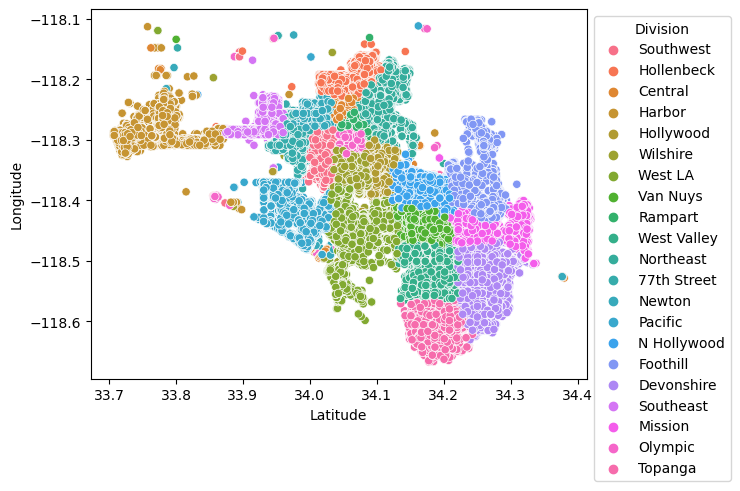

In [256]:
query = '''select * from traffic
           where latitude between 33.6 and 34.4
           and longitude between -118.7 and -118.1
'''
data = pd.read_sql_query(query, engine)

plot = sns.scatterplot(data = data, x = data["Latitude"], y = data["Longitude"], hue = data["Division"])
sns.move_legend(plot, "upper left", bbox_to_anchor=(1, 1))

<div class="alert alert-block alert-warning"> 
<b> Requirement 7: (5 points) </b>  Are the imputed records the same as the non-imputed records?  Select imputeAge, Gender and Descent.

- Compare Gender for imputeAge (imputed vs non-imputed records). Would you consider the imputed records to be similar to non-imputed in regards to Gender?
- Compare Descent for imputeAge (imputed vs non-imputed records). Would you consider the imputed records to be similar to non-imputed in regards to Descent?
    
   


</div>

In [313]:
query = '''select imputeage, gender, count(gender) as count from traffic
           group by imputeage, gender
'''
impute_gender_data = pd.read_sql_query(query, engine)
print(impute_gender_data, "\n\nThere are many more non imputed records overall, but proportionally there are more Female and Other imputed records \nthan Male. I would not consider them to be similar for this reason\n")

query = '''select imputeage, descent, count(descent) as count from traffic
           group by imputeage, descent
'''
impute_descent_data = pd.read_sql_query(query, engine)
print(impute_descent_data, "\n\nThere are many more non imputed records overall, but proportionally there are more Unknown and Other imputed records, and fewer Asian imputed records. I would not consider them to be similar for this reason")


   imputeAge  Gender   count
0          0  Female  192889
1          0    Male  276568
2          0   Other    3594
3          1  Female   16992
4          1    Male   47928
5          1   Other   11576 

There are many more non imputed records overall, but proportionally there are more Female and Other imputed records 
than Male. I would not consider them to be similar for this reason

    imputeAge   Descent   count
0           0     Asian   26920
1           0     Black   70380
2           0  Hispanic  188439
3           0     Other   59910
4           0   Unknown   11554
5           0     White  115848
6           1     Asian    1236
7           1     Black    4338
8           1  Hispanic   21445
9           1     Other   18797
10          1   Unknown   16893
11          1     White   13787 

There are many more non imputed records overall, but proportionally there are more Unknown and Other imputed records, and fewer Asian imputed records. I would not consider them to be similar f

<div class="alert alert-block alert-warning"> 
<b> Requirement 8: (15 points) </b>  Have hit and run accidents increased or decreased over time?  Is the change over time the same in all Districts?

1. Select only non-imputed rows for both types of Hit and Run accidents that occurred 2010-2020.
2. Show the count of accidents for each District for every year.  How you show the data is up to you.
3. In a Markdown cell, explain if the data is showing you that Hit and Run accidents are mosting increasing or decreasing in different districts?  Which districts saw increases in 2020 over previous year?
4. In a Markdown cell, explain what you see with 2010 and 2011 and suggest what can be done with these years?
   
</div>

In [327]:
query = '''select reporting_district, year, count(t.dr_number) as count from traffic as t
           join mo_accident as a
           on t.dr_number = a.dr_number
           where mo_codes = 3029
           or mo_codes = 3030
           and year between 2010 and 2020
           and imputeage = 0
           group by reporting_district, year
'''

q8_data = pd.read_sql_query(query, engine)

q8_data.to_csv("q8_data.csv")


In [326]:
query = '''select year, count(t.dr_number) as count from traffic as t
           join mo_accident as a
           on t.dr_number = a.dr_number
           where mo_codes = 3029
           or mo_codes = 3030
           and year between 2010 and 2020
           and imputeage = 0
           group by year
'''

pd.read_sql_query(query, engine)

,Year,count
0,2010,20
1,2011,72
2,2012,14883
3,2013,17682
4,2014,18557
5,2015,21300
6,2016,24036
7,2017,24794
8,2018,24749
9,2019,24753


Overall, hit and runs are increasing as you can see in the query above and also via reporting_district level analysis in the csv. In years 2010 and 2011, there are so few records that I would remove these two years. Perhaps there was a data migration and most hit and run data is stored in a legacy system, or there was some other issue with data transfer. There was an overall dropoff in the year 2020, likely due to COVID-19 lockdowns.

In [347]:
# reporting_district = q8_data["Reporting_District"].unique()

# for reporting_district in q8_data:
#     if q8_data["Reporting_District"] == reporting_district:
#         print("test")



False

<div class="alert alert-block alert-warning"> 
<b> Requirement 9: (5 points) </b>  We haven't looked yet at Ages of drivers across the years.  Are these complete enough to do an Age analysis?
   
1. Select for all accidents types.
2. Show Age counts for each year.
    

</div>

In [354]:
query = '''select age, count(*) as count from traffic
           group by age
'''

q9_data = pd.read_sql_query(query, engine)

These are complete enough to do an age analysis, but there are some potential discrepancies. It seems like the ages are not self reported, or if they are the individuals give approximations for their age. For example, the age 40 has 89k records but 39 and 41 are both fractions of that number. Maybe 40 year olds really do get into that many more accidents than others who are a similar age, or the data is inaccurate.

<div class="alert alert-block alert-warning"> 
<b> Requirement 10: (15 points) </b>  Your choice of what question to ask of this data. What are you still curious about? To get full credit for this question, it needs to be orginal and unlike any question asked in the notebook already. Consider alternative ways to look at this data that has not already been explored.
    
1. Clearly state your question in a Markdown cell.
2. Show the code for your answer.
3. Clearly state your interpretation of the findings in another markdown cell.
   
</div>

I would like to analyze time of the day to understand if there are any time periods within a day where accidents occur more often

question: Using SQL only, group accident count by hour to understand if crashes are uniformly distributed throughout the day, or if certain times over or under index in crash counts

In [357]:
query = '''select hour, count(*) as count from traffic
           group by hour
           order by count desc
'''

pd.read_sql_query(query, engine)

,Hour,count
0,17,38003
1,18,35638
2,15,35494
3,16,34903
4,14,33011
5,13,30453
6,12,29990
7,19,29737
8,8,26127
9,11,25762


Based on the output above, there is not a uniform distribution throughout the day. The most crashes occur between 1:00 PM and 6:00 PM. This is interesting, my original hypothesis was that peaks would occur around morning and evening rush hours. While the highest volume tapers off around evening rush hour, it begins well before rush hour starts. There are no hours around the morning that are in the top 5. I figured that more crashes would happen during the morning rush!